In [1]:
# Import necessary libraries for the task.
import torch  # Import PyTorch for deep learning.
import torch.nn as nn  # Import the neural network module from PyTorch.
import numpy as np  # Import NumPy for numerical operations.
import matplotlib.pyplot as plt  # Import Matplotlib for visualization.
from sklearn.model_selection import train_test_split  # Import train_test_split from Scikit-Learn.

# NEW!
from torch.utils.data import DataLoader  # Import DataLoader from PyTorch.


In [13]:
# Import the Iris dataset using Seaborn.
import seaborn as sns
iris_data = sns.load_dataset('iris')

# Convert the dataset from a pandas dataframe to a PyTorch tensor.
data = torch.tensor(iris_data[iris_data.columns[0:4]].values).float()

# Transform species labels into numerical values.
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris_data.species == 'versicolor'] = 1
labels[iris_data.species == 'virginica'] = 2


# A brief aside on using DataLoader

In [3]:
# Create a fake dataset for demonstration purposes.
fake_data = np.tile(np.array([1, 2, 3, 4]), (10, 1)) + np.tile(10 * np.arange(1, 11), (4, 1)).T
fake_labels = np.arange(10) > 4
print(fake_data), print(' ')
print(fake_labels)


[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]


In [4]:
# Create a DataLoader object for the fake data with shuffling enabled.
fake_data_loader = DataLoader(fake_data, shuffle=True)
print(fake_data_loader)
print(fake_data_loader.batch_size)


1


In [5]:
# Iterate through the fake data DataLoader.
for i, one_sample in enumerate(fake_data_loader):
    print(i, one_sample, one_sample.shape)

# But where are the labels??


0 tensor([[21, 22, 23, 24]], dtype=torch.int32) torch.Size([1, 4])
1 tensor([[61, 62, 63, 64]], dtype=torch.int32) torch.Size([1, 4])
2 tensor([[41, 42, 43, 44]], dtype=torch.int32) torch.Size([1, 4])
3 tensor([[71, 72, 73, 74]], dtype=torch.int32) torch.Size([1, 4])
4 tensor([[81, 82, 83, 84]], dtype=torch.int32) torch.Size([1, 4])
5 tensor([[11, 12, 13, 14]], dtype=torch.int32) torch.Size([1, 4])
6 tensor([[91, 92, 93, 94]], dtype=torch.int32) torch.Size([1, 4])
7 tensor([[31, 32, 33, 34]], dtype=torch.int32) torch.Size([1, 4])
8 tensor([[51, 52, 53, 54]], dtype=torch.int32) torch.Size([1, 4])
9 tensor([[101, 102, 103, 104]], dtype=torch.int32) torch.Size([1, 4])


In [6]:
# Create a custom dataset containing both fake data and labels.
fake_dataset = torch.utils.data.TensorDataset(torch.Tensor(fake_data), torch.Tensor(fake_labels))
print(fake_dataset.tensors), print(' ')

# Create another DataLoader for the custom dataset with shuffling.
fake_data_loader = DataLoader(fake_dataset, shuffle=True)

# Iterate through the data DataLoader.
for data, label in fake_data_loader:
    print(data, label)


(tensor([[ 11.,  12.,  13.,  14.],
        [ 21.,  22.,  23.,  24.],
        [ 31.,  32.,  33.,  34.],
        [ 41.,  42.,  43.,  44.],
        [ 51.,  52.,  53.,  54.],
        [ 61.,  62.,  63.,  64.],
        [ 71.,  72.,  73.,  74.],
        [ 81.,  82.,  83.,  84.],
        [ 91.,  92.,  93.,  94.],
        [101., 102., 103., 104.]]), tensor([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]))
 
tensor([[41., 42., 43., 44.]]) tensor([0.])
tensor([[81., 82., 83., 84.]]) tensor([1.])
tensor([[91., 92., 93., 94.]]) tensor([1.])
tensor([[101., 102., 103., 104.]]) tensor([1.])
tensor([[71., 72., 73., 74.]]) tensor([1.])
tensor([[61., 62., 63., 64.]]) tensor([1.])
tensor([[51., 52., 53., 54.]]) tensor([0.])
tensor([[31., 32., 33., 34.]]) tensor([0.])
tensor([[11., 12., 13., 14.]]) tensor([0.])
tensor([[21., 22., 23., 24.]]) tensor([0.])


In [7]:
# Use Scikit-Learn to split the fake data into training and test sets.
train_data, test_data, train_labels, test_labels = train_test_split(fake_data, fake_labels, test_size=0.2)

# Convert them into PyTorch Datasets.
train_data = torch.utils.data.TensorDataset(torch.Tensor(train_data), torch.Tensor(train_labels))
test_data = torch.utils.data.TensorDataset(torch.Tensor(test_data), torch.Tensor(test_labels))

# Finally, translate into DataLoader objects.
train_loader = DataLoader(train_data, batch_size=4)
test_loader = DataLoader(test_data)


In [8]:
# Examine the contents of the training data DataLoader (batching is an advantage of DataLoader).
print('TRAINING DATA')
for batch, label in train_loader:  # Iterable
    print(batch, label)
    print(' ')

print(' ')
print('TESTING DATA')
for batch, label in test_loader:  # Iterable
    print(batch, label)
    print(' ')


TRAINING DATA
tensor([[ 11.,  12.,  13.,  14.],
        [101., 102., 103., 104.],
        [ 41.,  42.,  43.,  44.],
        [ 21.,  22.,  23.,  24.]]) tensor([0., 1., 0., 0.])
 
tensor([[81., 82., 83., 84.],
        [31., 32., 33., 34.],
        [51., 52., 53., 54.],
        [71., 72., 73., 74.]]) tensor([1., 0., 0., 1.])
 
 
TESTING DATA
tensor([[91., 92., 93., 94.]]) tensor([1.])
 
tensor([[61., 62., 63., 64.]]) tensor([1.])
 


# Now back to the real data!

In [10]:
# Check the sizes of data batches.
for X, y in train_loader:
    print(X.shape, y.shape)

X, y


torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])


(tensor([[81., 82., 83., 84.],
         [31., 32., 33., 34.],
         [51., 52., 53., 54.],
         [71., 72., 73., 74.]]),
 tensor([1., 0., 0., 1.]))

In [14]:
data

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [15]:
# Use Scikit-Learn to split the Iris data into training and test sets.
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=0.8)

# Convert them into PyTorch Datasets (already converted to tensors).
train_data = torch.utils.data.TensorDataset(train_data, train_labels)
test_data = torch.utils.data.TensorDataset(test_data, test_labels)

# Finally, translate into DataLoader objects.
train_loader = DataLoader(train_data, shuffle=True, batch_size=12)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])


In [16]:
# Define a function to create a new ANN model.
def create_a_new_model():

    # Model architecture.
    ANN_model = nn.Sequential(
        nn.Linear(4, 64),   # Input layer
        nn.ReLU(),          # ReLU activation
        nn.Linear(64, 64),  # Hidden layer
        nn.ReLU(),          # ReLU activation
        nn.Linear(64, 3)    # Output layer
    )

    # Loss function.
    loss_function = nn.CrossEntropyLoss()

    # Optimizer.
    optimizer = torch.optim.SGD(ANN_model.parameters(), lr=0.01)

    return ANN_model, loss_function, optimizer


In [17]:
# Global parameter: Number of epochs.
num_epochs = 500

# Define a function to train the model.
def train_the_model():

    # Initialize accuracies as empty lists (not storing losses here).
    train_acc = []
    test_acc = []

    # Loop over epochs.
    for epoch_idx in range(num_epochs):

        # Loop over training data batches.
        batch_acc = []
        for X, y in train_loader:

            # Forward pass and loss.
            y_hat = ANN_model(X)
            loss = loss_function(y_hat, y)

            # Backpropagation.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Compute training accuracy just for this batch.
            batch_acc.append(100 * torch.mean((torch.argmax(y_hat, axis=1) == y).float()).item())
        # End of batch loop...

        # Now that we've trained through the batches, get their average training accuracy.
        train_acc.append(np.mean(batch_acc))

        # Test accuracy.
        X, y = next(iter(test_loader))  # Extract X and y from the test DataLoader.
        pred_labels = torch.argmax(ANN_model(X), axis=1)
        test_acc.append(100 * torch.mean((pred_labels == y).float()).item())

    # Function output.
    return train_acc, test_acc


In [18]:
# Create a new ANN model.
ANN_model, loss_function, optimizer = create_a_new_model()

# Train the model.
train_acc, test_acc = train_the_model()


# Modeling

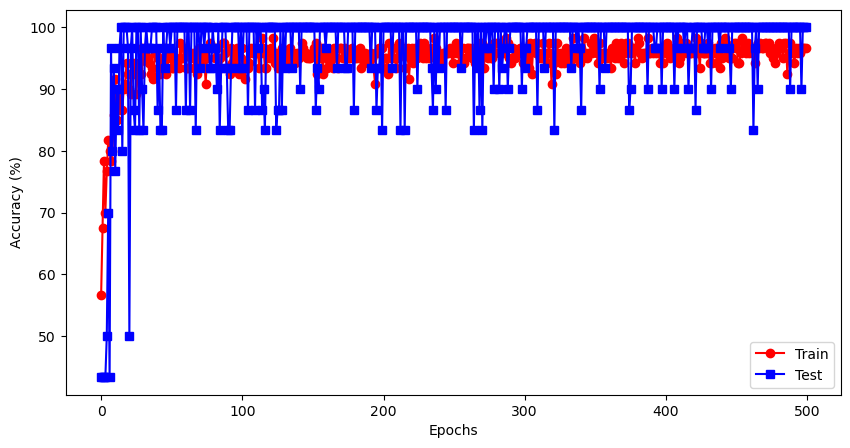

In [20]:
# Plot the results.
fig = plt.figure(figsize=(10, 5))

plt.plot(train_acc, 'ro-')
plt.plot(test_acc, 'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train', 'Test'])

# Optional zoom-in to final epochs
# plt.xlim([300,500])
# plt.ylim([90,100.5])

plt.show()


# Additional explorations